# Лекция 1

### Задачи CV

* OpecCV, PyTorch, TensorFlow

1. Classification
2. Detection
3. Segmentation
3. Optical Character Recognition (image -> OCR -> text)
4. KeyPoint, Pose Estimation
5. Object Tracking

### Низкоуровневое зрение: 

1. Эквализация гистограммы
2. Цветовые пространства
3. Каскады Хаара
4. Сегментация
5. Линейная фильтрация изображений

In [1]:
# !pip install opencv-python

In [2]:
# !pip install matplotlib

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

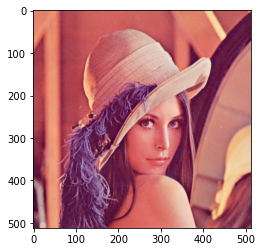

In [4]:
# Прочитать изображение из файла в массив
img_rbg1 = plt.imread('lena.jpg') 
plt.imshow(img_rbg1) # Отображать данные в виде изображения

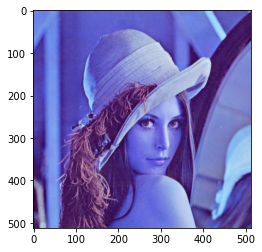

In [5]:
# загружает изображение из указанного файла
img = cv2.imread('lena.jpg') 
# cv2.imshow('Image', img)
plt.imshow(img)

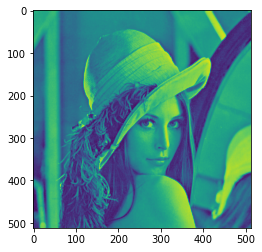

In [6]:
# преобразования изображения из одного цветового пространства в другое. 
# В OpenCV доступно более 150 методов преобразования цветового пространства.

# https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html
        
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
plt.show()

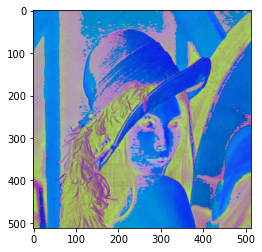

In [7]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.imshow(hsv)
plt.show()

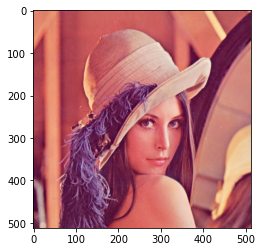

In [8]:
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)
plt.show()

In [9]:
# rgb = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
# plt.imshow(rgb)
# plt.show()

In [10]:
np.shape(gray), gray.shape

((512, 512), (512, 512))

In [11]:
np.shape(hsv), hsv.shape

((512, 512, 3), (512, 512, 3))

In [12]:
np.shape(rgb), rgb.shape

((512, 512, 3), (512, 512, 3))

In [13]:
img

array([[[128, 138, 225],
        [127, 137, 224],
        [126, 136, 224],
        ...,
        [126, 145, 236],
        [110, 129, 220],
        [ 86, 104, 197]],

       [[127, 137, 224],
        [127, 137, 224],
        [127, 137, 224],
        ...,
        [130, 150, 235],
        [112, 132, 217],
        [ 83, 102, 189]],

       [[127, 137, 224],
        [127, 137, 224],
        [128, 138, 225],
        ...,
        [127, 148, 230],
        [112, 133, 215],
        [ 85, 105, 190]],

       ...,

       [[ 55,  21,  82],
        [ 54,  20,  81],
        [ 62,  28,  92],
        ...,
        [ 82,  71, 175],
        [ 78,  68, 175],
        [ 74,  65, 175]],

       [[ 55,  18,  80],
        [ 56,  19,  81],
        [ 66,  32,  96],
        ...,
        [ 82,  69, 177],
        [ 80,  71, 181],
        [ 81,  72, 183]],

       [[ 56,  19,  81],
        [ 58,  21,  83],
        [ 68,  34,  98],
        ...,
        [ 81,  68, 176],
        [ 81,  72, 183],
        [ 84,  74, 188]]

In [14]:
type(img)

numpy.ndarray

In [15]:
img[:,:,0]

array([[128, 127, 126, ..., 126, 110,  86],
       [127, 127, 127, ..., 130, 112,  83],
       [127, 127, 128, ..., 127, 112,  85],
       ...,
       [ 55,  54,  62, ...,  82,  78,  74],
       [ 55,  56,  66, ...,  82,  80,  81],
       [ 56,  58,  68, ...,  81,  81,  84]], dtype=uint8)

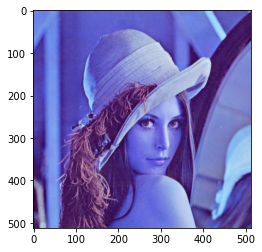

In [16]:
plt.imshow(img, 
           cmap='gray', # имя карты цветов
           vmin=0, vmax=255) # диапазон данных, который покрывает карта цветов

In [17]:
gray

array([[163, 162, 161, ..., 170, 154, 130],
       [162, 162, 162, ..., 173, 155, 126],
       [162, 162, 163, ..., 170, 155, 128],
       ...,
       [ 43,  42,  51, ..., 103, 101,  99],
       [ 41,  42,  55, ..., 103, 105, 106],
       [ 42,  44,  57, ..., 102, 106, 109]], dtype=uint8)

In [18]:
cv2.add(gray, 50)

array([[213, 212, 211, ..., 220, 204, 180],
       [212, 212, 212, ..., 223, 205, 176],
       [212, 212, 213, ..., 220, 205, 178],
       ...,
       [ 93,  92, 101, ..., 153, 151, 149],
       [ 91,  92, 105, ..., 153, 155, 156],
       [ 92,  94, 107, ..., 152, 156, 159]], dtype=uint8)

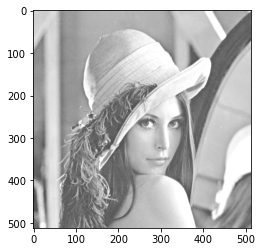

In [19]:
img_add = cv2.add(gray, 50) 
# 250 + 10 = 260 => 255
plt.imshow(img_add, cmap='gray', vmin=0, vmax=255)

# 1. Эквализация гистограммы

https://habr.com/ru/post/244507/

**Гистограммой изображения** будем называть **дискретную функцию H**, определённую на множестве значений $[0;2^{bpp}]$, где $bpp$ – количество бит, отводимое для кодирования яркости одного пиксела. 

Хоть это и не является обязательным, но гистограммы часто нормируют в диапазон [0;1], выполняя деление каждого значения функции $H[i]$ на общее количество пикселов изображения.

Внимательно изучив соответствующую гистограмму можно сделать некоторые выводы и о самом исходном изображении. Например, гистограммы очень тёмных изображений характеризуются тем, что ненулевые значения гистограммы сконцентрированы около нулевых уровней яркости, а для очень светлых изображений наоборот – все ненулевые значения сконцентрированы в правой части гистограммы.
Интуитивно можно сделать вывод, что **наиболее удобным для восприятия человеком будет изображение, у которого гистограмма близка к равномерному распределению**. Т.е. для улучшения визуального качества к изображению надо **применить** такое **преобразование**, **чтобы гистограмма** результата **содержала все возможные значения яркости и при этом в примерно одинаковом количестве**. Такое преобразование называется **эквализацией гистограммы**.

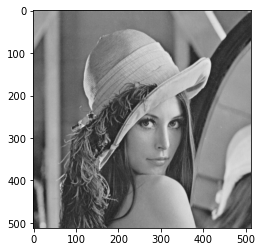

In [20]:
plt.imshow(gray, cmap='gray', vmin=0, vmax=255)

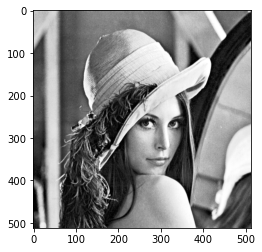

In [21]:
equ = cv2.equalizeHist(gray)
plt.imshow(equ, cmap='gray', vmin=0, vmax=255)

In [22]:
gray.shape

(512, 512)

In [23]:
gray.reshape(gray.shape[0]*gray.shape[1])

array([163, 162, 161, ..., 102, 106, 109], dtype=uint8)

Text(0.5, 1.0, 'equ')

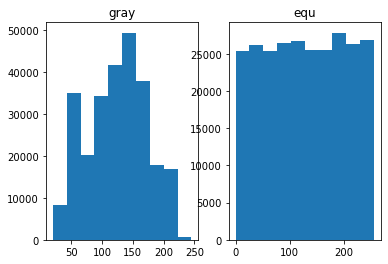

In [24]:
fig, axs = plt.subplots(1, 2)
axs[0].hist(gray.reshape(gray.shape[0]*gray.shape[1]))
axs[0].set_title('gray')
axs[1].hist(equ.reshape(equ.shape[0]*equ.shape[1]))
axs[1].set_title('equ')

# 2. Цветовые пространства

https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html

https://tproger.ru/translations/opencv-python-guide/

https://habr.com/ru/post/181580/

In [25]:
cv2.COLOR_BGR2RGB

4

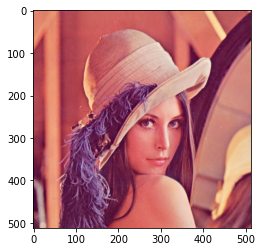

In [26]:
# cvtColor - преобразования изображения из одного цветового пространства в другое
result = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(result)

In [28]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

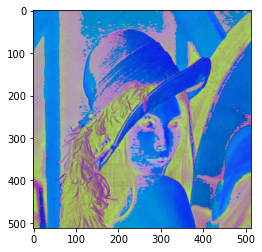

In [29]:
plt.imshow(hsv)

In [30]:
hsv.shape

(512, 512, 3)

In [31]:
hsv[:,:,1]

array([[110, 110, 112, ..., 119, 128, 144],
       [110, 110, 110, ..., 114, 123, 143],
       [110, 110, 110, ..., 114, 122, 141],
       ...,
       [190, 192, 177, ..., 152, 156, 160],
       [198, 195, 170, ..., 156, 155, 155],
       [195, 190, 167, ..., 156, 155, 155]], dtype=uint8)

In [32]:
hsv[:,:,1] = cv2.multiply(hsv[:,:,1],1.5)

In [33]:
hsv[:,:,1]

array([[165, 165, 168, ..., 178, 192, 216],
       [165, 165, 165, ..., 171, 184, 214],
       [165, 165, 165, ..., 171, 183, 212],
       ...,
       [255, 255, 255, ..., 228, 234, 240],
       [255, 255, 255, ..., 234, 232, 232],
       [255, 255, 250, ..., 234, 232, 232]], dtype=uint8)

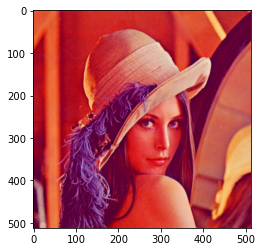

In [34]:
result = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
plt.imshow(result)

# 3. Каскады Хаара

https://habr.com/ru/post/208092/

Применяя этот метод, из картинки можно вычленять достаточно простые признаки. Для этого необходимо использовать несколько прямоугольников.

Пиксели, попадающие в белый прямоугольник, берутся со знаком «плюс», в черный — со знаком «минус». Все значения суммируются, и получается одно число. Прямоугольники и коэффициенты для них выбираются с помощью алгоритма AdaBoost. У лица имеются некоторые паттерны, и в итоге каскад фильтров такого рода показывает, есть ли внутри него лицо или нет.

Сейчас есть методы детекции лиц, превосходящие по качеству каскады Хаара. Тем не менее это простой подход, и он часто встречается в готовом к использованию виде. Если не требуется решать задачу с высоким качеством, а получить детектор нужно быстро и просто, каскады Хаара из библиотеки OpenCV — это отличный вариант.

https://ru.wikipedia.org/wiki/AdaBoost

<!-- ![title](features.png) -->
<img src="features.png" alt="Drawing" style="width: 400px;"/>

https://russianblogs.com/article/3147192877/

https://docs.opencv.org/2.4/doc/user_guide/ug_traincascade.html

### Обнаружение

In [35]:
import numpy as np
import cv2

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

img = cv2.imread('lena.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [36]:
# 'haarcascade_frontalface_default.xml'
# ...\Anaconda3\Lib\site-packages\cv2\data\haarcascade_frontalface_default.xml
# Либо скачайте отдельно файл из исходников OpenCV на GitHub.
# https://github.com/opencv/opencv/blob/master/data/haarcascades/haarcascade_frontalface_default.xml

In [37]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

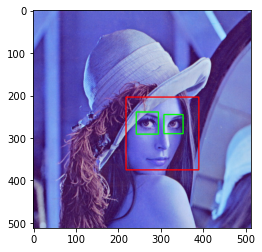

In [38]:
for (x,y,w,h) in faces:
    img = cv2.rectangle(img,
                        (x,y),
                        (x+w, y+h),
                        (255,0,0), 
                        2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

# cv2.imshow('img',img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.imshow(img)

# 4. Сегментация

Задачу сегментации в общем случае решить тоже несложно. Один из способов — отрезать пиксели выше какого-то порога и назначить их объекту, а пиксели ниже порога — фону.

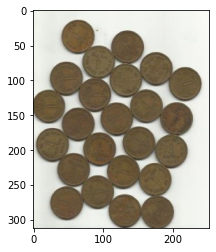

In [39]:
img = cv2.imread('water_coins.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

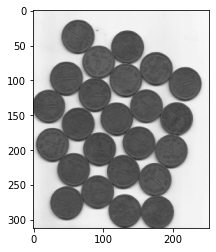

In [40]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray', vmin=0, vmax=255)

In [41]:
cv2.THRESH_BINARY_INV

1

In [42]:
cv2.THRESH_OTSU

8

https://tproger.ru/translations/opencv-python-guide/#:~:text=%D0%A4%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D1%8F%20threshold%20%D0%B2%D0%BE%D0%B7%D0%B2%D1%80%D0%B0%D1%89%D0%B0%D0%B5%D1%82%20%D0%B8%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5%2C%20%D0%B2,)%20127%2C%20%E2%80%94%20%D0%BD%D0%B0%20255.&text=%D0%97%D0%B4%D0%B5%D1%81%D1%8C%20%D0%B2%D1%81%D1%91%2C%20%D1%87%D1%82%D0%BE%20%D1%82%D0%B5%D0%BC%D0%BD%D0%B5%D0%B5%2C%20%D1%87%D0%B5%D0%BC,%D1%87%D1%82%D0%BE%20%D1%8F%D1%80%D1%87%D0%B5%2C%20%E2%80%94%20%D0%BD%D0%B0%20200.

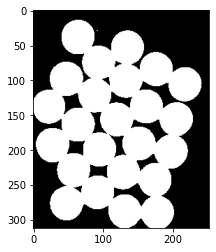

In [64]:
ret, thresh = cv2.threshold(gray, # source image, which should be a grayscale image 
                            127, # threshold value which is used to classify the pixel values
                            255, # maximum value which is assigned to pixel values exceeding the threshold
                            cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU) # thresholding types

# все что темнее 150 заменяется на 12
# а светлее на 255

# Simple thresholding types are:
# cv.THRESH_BINARY
# cv.THRESH_BINARY_INV
# cv.THRESH_TRUNC
# cv.THRESH_TOZERO
# cv.THRESH_TOZERO_INV

plt.imshow(thresh, 
           cmap='gray', 
           vmin=0, 
           vmax=255)

https://habr.com/ru/post/441006/

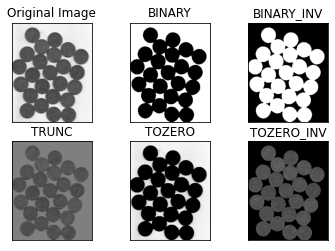

In [75]:
# https://docs.opencv.org/3.4/d7/d4d/tutorial_py_thresholding.html

# Алгоритм определяет порог для пикселя на основе небольшой области вокруг него. 
# Таким образом, мы получаем разные пороги для разных областей одного и того же 
# изображения, что дает лучшие результаты для изображений с разным освещением.   

import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = gray
ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

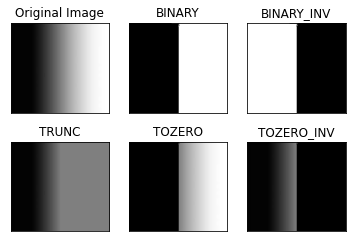

In [76]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('gradient.png',0)
ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

# 5. Линейная фильтрация изображений

### Скользящее среднее — свертка.

Проще всего объяснить, что такое линейная фильтрация, на примере. 

https://ai-news.ru/2019/12/kak_rabotaet_komputernoe_zrenie_izuchaem_osnovnye_algoritmy_chtoby_ovladet.html

Пусть требуется подсчитать среднее в окне 3 × 3 для каждого пикселя. 
Вычисление среднего можно записать так:

<!-- ![title](img/0pW4eJr5euc.jpg)  -->
$$ g[n,m] = \frac{1}{9} \sum^{n+1}_{k=n-1} \sum^{m+1}_{l=m-1} f[k,l] = 
\frac{1}{9} \sum^{1}_{k=-1} \sum^{1}_{l=-1} f[n-k,m-l] $$

Переписав формулу в следующем виде, можно получить выражение для свертки:

<!-- ![title](img/yXUc7UMDJfM.jpg)  -->
$$(f \cdot h)[m,n] = \frac{1}{9} \sum_{k,l} h[m-k,n-l] $$


* $f$ — это изображение (двухмерная функция, характеризующая картинку), 
* $k, l$ — координаты пикселя, 
* $f$ — яркость пикселя, 
* $h$ — ядро свертки (матрица $3 × 3$, состоящая из единиц).

![title](img/1VOhpyVRAuk.jpg)


Если ядро свертки — матрица, то свертка — это скользящее среднее. 

В OpenCV произвести такую свертку можно следующим образом:

In [91]:
img = cv2.imread('lena.jpg')

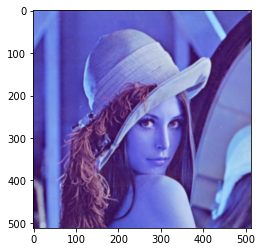

In [106]:
kernel = np.array([[1,1,1],
                   [1,1,1],
                   [1,1,1]],  np.float32) / 9

dst = cv2.filter2D(img,-1,kernel)
plt.imshow(dst)

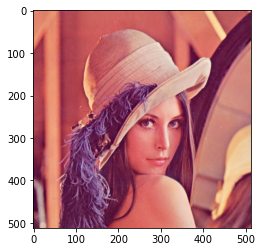

In [107]:
result = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(result)

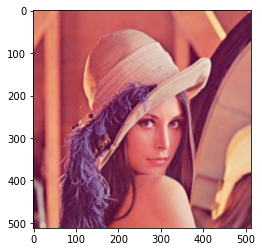

In [97]:
result = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
plt.imshow(result)

Картинка при этом становится более размытой. 

Также размытие изображения можно получать при помощи свертки с гауссовской функцией.

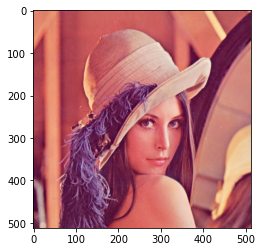

In [118]:
cv2.GaussianBlur(img, (5,5), 6)
result = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(result)

# Детекция границ

Cвертки также можно применять для детекции границ. С помощью сверток, как на картинке ниже, можно получить вертикальные и горизонтальные границы изображения. Если объединить результаты этих двух сверток, можно получить все границы.

![title](img/dUORLoVn6Gs.jpg)

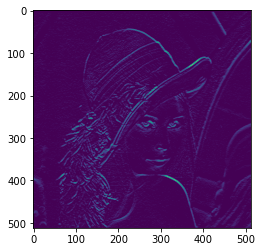

In [120]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
kernel = np.array([[-1,-1,-1],
                   [ 0, 0, 0],
                   [ 1, 1, 1]],np.float32) / 9
dst1 = cv2.filter2D(gray,-1,kernel)
plt.imshow(dst1)

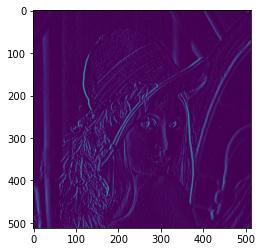

In [121]:
kernel = np.array([[-1,0,1],
                   [-1,0,1],
                   [-1,0,1]],np.float32) / 9
dst2 = cv2.filter2D(gray,-1,kernel)
plt.imshow(dst2)

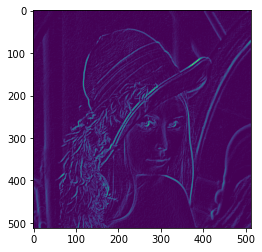

In [122]:
plt.imshow(dst1 + dst2)

https://ai-news.ru/2019/12/kak_rabotaet_komputernoe_zrenie_izuchaem_osnovnye_algoritmy_chtoby_ovladet.html

Neyral Network
* Perceptron
* Multilayer Perceptron
* Convolutional NN
* Spiking NN

Функции активации:
1. sigmiod
2. ReLU (rectified linear unit)
3. Гиперболический тангенс

![title](img/173157.png)

* Learning rate (скорость обучения) 
* стохастический градиентный спуск
* backpropagation <!-- ![image.png](attachment:image.png) -->

https://playground.tensorflow.org/ - Пример визуализации нейронной сети


Основная идея глубокого обучения — не просто изучение признаков, 
а извлечение их иерархии: извлечение признаков вышестоящего уровня 
в пространстве нижестоящего

Свертка

Неформально эту операцию можно описать следующим образом — окном размера ядра g проходим с заданным шагом (обычно 1) все изображение f, на каждом шаге поэлементно умножаем содержимое окна на ядро g, результат суммируется и записывается в матрицу результата


https://github.com/moemen95/Pytorch-Project-Template/blob/master/tutorials/mnist_tutorial.md
